In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import modelFusion as MF
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Support vector radial basis classifier
A = pd.read_csv('Crank data/Crank 44/w9zj18ewvMD2D.csv')
# Random forest classification
B = pd.read_csv('Crank data/Crank 44/w3qaqvdepL2JZ.csv')
# Weighted logistic classifier
C = pd.read_csv('Crank data/Crank 44/wZWGwwoZOBZwZ.csv')
# Gradient boosted tree
D = pd.read_csv('Crank data/Crank 44/w3M6mXamm38Or.csv')

In [3]:
SVM = MF.preclean(A)
RF = MF.preclean(B)
WLC = MF.preclean(C)
GBT = MF.preclean(D)

raw = MF.raw_def([SVM,RF,WLC,GBT])

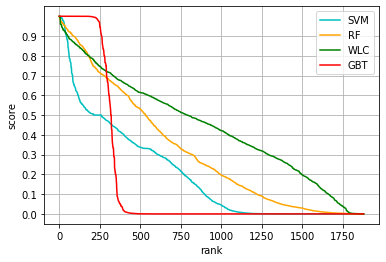

In [4]:
RSCG = MF.RSC_graph(raw)

In [5]:
RA, A_prec = MF.rank_raw(SVM)
RB, B_prec = MF.rank_raw(RF)
RC, C_prec = MF.rank_raw(WLC)
RD, D_prec = MF.rank_raw(GBT)

In [6]:
DS_A, DS_B,DS_C, DS_D = MF.diversityS(raw)

In [7]:
df = MF.cognitiveD(raw)
df

,SVM,RF,WLC,GBT
SVM,0.000000,218.295803,454.642194,60.392663
RF,218.295803,0.000000,236.346392,278.688466
WLC,454.642194,236.346392,0.000000,515.034857
GBT,60.392663,278.688466,515.034857,0.000000


In [9]:
SCAB = MF.two_fusionW(SVM,RF,[DS_A,DS_B])
SCAC = MF.two_fusionW(SVM,WLC,[DS_A,DS_C])
SCAD = MF.two_fusionW(SVM,GBT,[DS_A,DS_D])
SCBC = MF.two_fusionW(RF,WLC,[DS_B,DS_C])
SCBD = MF.two_fusionW(RF,GBT,[DS_B,DS_D])
SCCD = MF.two_fusionW(RF,GBT,[DS_C,DS_D])
SCABC = MF.three_fusionW(SVM,RF,WLC,[DS_A,DS_B,DS_C])
SCABD = MF.three_fusionW(SVM,RF,GBT,[DS_A,DS_B,DS_D])
SCACD = MF.three_fusionW(SVM,WLC,GBT,[DS_A,DS_C,DS_D])
SCBCD = MF.three_fusionW(SVM,WLC,GBT,[DS_B,DS_C,DS_D])
SCABCD = MF.four_fusionW(SVM,RF,WLC,GBT,[DS_A,DS_B,DS_C,DS_D])


/home/jupyter/tacc-work/Yuanqing/modelFusion.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  CMB['score'] = (first.iloc[:,[-1]]*weight[0] + second.iloc[:,[-1]]*weight[1] )/(weight[0]+weight[1])
/home/jupyter/tacc-work/Yuanqing/modelFusion.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  CMB['score'] = (first.iloc[:,[-1]]*weight[0] + second.iloc[:,[-1]]*weight[1]+third.iloc[:,[-1]]*weight[2] )/(weight[0]+weight[1]+weight[2])
/home/jupyter/tacc-work/Yuanqing/modelFusion.py:206: SettingWithCopyWarning: 
A value is trying to be set o

In [10]:
RCAB = MF.two_fusionW(RA,RB,[DS_A,DS_B],False)
RCAC = MF.two_fusionW(RA,RC,[DS_A,DS_C],False)
RCAD = MF.two_fusionW(RA,RD,[DS_A,DS_D],False)
RCBC = MF.two_fusionW(RB,RC,[DS_B,DS_C],False)
RCBD = MF.two_fusionW(RB,RD,[DS_B,DS_D],False)
RCCD = MF.two_fusionW(RC,RD,[DS_C,DS_D],False)
RCABC = MF.three_fusionW(RA,RB,RC,[DS_A,DS_B,DS_C],False)
RCABD = MF.three_fusionW(RA,RB,RD,[DS_A,DS_B,DS_D],False)
RCACD = MF.three_fusionW(RA,RC,RD,[DS_A,DS_C,DS_D],False)
RCBCD = MF.three_fusionW(RB,RC,RD,[DS_B,DS_C,DS_D],False)
RCABCD = MF.four_fusionW(RA,RB,RC,RD,[DS_A,DS_B,DS_C,DS_D],False)

In [11]:
#find the rank of each data point in each single ML model
rawRank = pd.DataFrame([RA['ID'],RA['truth'],RA['rank'],RB['rank'],RC['rank'],RD['rank']])
rawRank = rawRank.T

In [12]:
# combined all the fusion model into one for later
List = [SCAB,SCAC,SCAD,SCBC,SCBD,SCCD,SCABC,SCABD,SCACD,SCBCD,SCABCD]
ListName = ['AB','AC','AD','BC','BD','CD','ABC','ABD','ACD','BCD','ABCD']

In [13]:
for i in range(11):
    print(ListName[i])
    print(MF.find_df(List[i],rawRank,sum(RA['truth'])))

AB
        ID   rank     score  truth
282  283.0  354.0  0.523875    1.0
None
AC
Empty DataFrame
Columns: []
Index: []
None
AD
Empty DataFrame
Columns: []
Index: []
None
BC
Empty DataFrame
Columns: []
Index: []
None
BD
Empty DataFrame
Columns: []
Index: []
None
CD
Empty DataFrame
Columns: []
Index: []
None
ABC
Empty DataFrame
Columns: []
Index: []
None
ABD
Empty DataFrame
Columns: []
Index: []
None
ACD
Empty DataFrame
Columns: []
Index: []
None
BCD
Empty DataFrame
Columns: []
Index: []
None
ABCD
Empty DataFrame
Columns: []
Index: []
None


In [14]:
for i in range(11):
    print(ListName[i])
    print(MF.find_dfop(List[i],rawRank,sum(RA['truth'])))

AB
Empty DataFrame
Columns: []
Index: []
None
AC
Empty DataFrame
Columns: []
Index: []
None
AD
Empty DataFrame
Columns: []
Index: []
None
BC
Empty DataFrame
Columns: []
Index: []
None
BD
Empty DataFrame
Columns: []
Index: []
None
CD
Empty DataFrame
Columns: []
Index: []
None
ABC
Empty DataFrame
Columns: []
Index: []
None
ABD
Empty DataFrame
Columns: []
Index: []
None
ACD
Empty DataFrame
Columns: []
Index: []
None
BCD
Empty DataFrame
Columns: []
Index: []
None
ABCD
Empty DataFrame
Columns: []
Index: []
None


In [15]:
TPlist = []
for i in range(len(List)):
    x = MF.find_TP(List[i], sum(List[i]['truth']))
    MF.addtolist(x,TPlist)
    
precision =[]

for i in List:
    x = MF.rank_function(i)
    MF.addtolist(x,precision)

    

In [39]:
dict = { 'True positive': TPlist,'SC': precision}
df = pd.DataFrame(dict, index=['AB','AC','AD','BC','BD','CD',
                               'ABC','ABD','ACD','BCD','ABCD'])
df

,SC,True positive
AB,0.719888,257
AC,0.593838,212
AD,0.700280,250
BC,0.602241,215
BD,0.703081,251
CD,0.714286,255
ABC,0.658263,235
ABD,0.705882,252
ACD,0.705882,252
BCD,0.705882,252


In [17]:
ListSingle = [RA,RB,RC,RD]
ListSingleName = ['A','B','C','D']
TPlistSin = []
for i in range(len(ListSingle)):
    x = MF.find_STP(ListSingle[i], sum(ListSingle[i]['truth']))
    MF.addtolist(x,TPlistSin)
    
precisionSin =[]

for i in ListSingle:
    x = MF.rank_function(i)
    MF.addtolist(x,precisionSin)

In [18]:
dict = { 'True positive': TPlistSin,'Single': [A_prec,B_prec,C_prec,D_prec]}
sf= pd.DataFrame(dict, index=['A','B','C','D'])
sf

,Single,True positive
A,0.680672,243
B,0.697479,249
C,0.439776,157
D,0.703081,251


In [19]:
ListRank = [RCAB,RCAC,RCAD,RCBC,RCBD,RCCD,RCABC,RCABD,RCACD,RCBCD,RCABCD]
ListRankName = ['AB','AC','AD','BC','BD','CD','ABC','RCABD','RCACD','RCBCD','RCABCD']


In [20]:
TPlistr = []
for i in range(len(ListRank)):
    x = MF.find_TP(ListRank[i], sum(ListRank[i]['truth']))
    MF.addtolist(x,TPlistr)
    
precisionr =[]

for i in ListRank:
    x = MF.rank_function(i)
    MF.addtolist(x,precisionr)

In [40]:
dict = { 'True positive': TPlistr,'RC': precisionr}
rc = pd.DataFrame(dict, index=ListName)
rc

,RC,True positive
AB,0.725490,259
AC,0.577031,206
AD,0.711485,254
BC,0.543417,194
BD,0.725490,259
CD,0.605042,216
ABC,0.627451,224
ABD,0.728291,260
ACD,0.666667,238
BCD,0.649860,232


In [22]:
result=pd.DataFrame()
for i in range(11):
    print(ListRankName[i])
    print(MF.find_df(ListRank[i],rawRank,sum(RA['truth'])))

AB
        ID   rank  score  truth
282  283.0  351.0  377.0    1.0
None
AC
        ID   rank       score  truth
691  692.0  344.0  413.694657    1.0
None
AD
Empty DataFrame
Columns: []
Index: []
None
BC
Empty DataFrame
Columns: []
Index: []
None
BD
          ID   rank       score  truth
926    927.0  357.0  376.842395    1.0
1253  1254.0  349.0  364.690220    1.0
None
CD
        ID   rank       score  truth
483  484.0  335.0  415.606803    1.0
None
ABC
Empty DataFrame
Columns: []
Index: []
None
RCABD
Empty DataFrame
Columns: []
Index: []
None
RCACD
Empty DataFrame
Columns: []
Index: []
None
RCBCD
Empty DataFrame
Columns: []
Index: []
None
RCABCD
Empty DataFrame
Columns: []
Index: []
None


In [23]:
resultss=pd.DataFrame()
for i in range(11):
    print(ListRankName[i])
    print(MF.find_dfop(ListRank[i],rawRank,sum(RA['truth'])))

AB
Empty DataFrame
Columns: []
Index: []
None
AC
Empty DataFrame
Columns: []
Index: []
None
AD
Empty DataFrame
Columns: []
Index: []
None
BC
Empty DataFrame
Columns: []
Index: []
None
BD
Empty DataFrame
Columns: []
Index: []
None
CD
Empty DataFrame
Columns: []
Index: []
None
ABC
Empty DataFrame
Columns: []
Index: []
None
RCABD
Empty DataFrame
Columns: []
Index: []
None
RCACD
Empty DataFrame
Columns: []
Index: []
None
RCBCD
Empty DataFrame
Columns: []
Index: []
None
RCABCD
Empty DataFrame
Columns: []
Index: []
None


In [42]:
newDF = pd.concat([df.SC,rc.RC], axis = 1)
newDF

,SC,RC
AB,0.719888,0.725490
AC,0.593838,0.577031
AD,0.700280,0.711485
BC,0.602241,0.543417
BD,0.703081,0.725490
CD,0.714286,0.605042
ABC,0.658263,0.627451
ABD,0.705882,0.728291
ACD,0.705882,0.666667
BCD,0.705882,0.649860


In [43]:
newDF.insert(0,'model',['AB','AC','AD','BC','BD','CD','ABC','ABD','ACD','BCD','ABCD'])

,model,SC,RC
AB,AB,0.719888,0.725490
AC,AC,0.593838,0.577031
AD,AD,0.700280,0.711485
BC,BC,0.602241,0.543417
BD,BD,0.703081,0.725490
CD,CD,0.714286,0.605042
ABC,ABC,0.658263,0.627451
ABD,ABD,0.705882,0.728291
ACD,ACD,0.705882,0.666667
BCD,BCD,0.705882,0.649860


In [44]:
d = {'model':['A','B','C','D'], 'SC': [A_prec,B_prec,C_prec,D_prec],'RC': [A_prec,B_prec,C_prec,D_prec] }
singleDF = pd.DataFrame(d, index = ['A','B','C','D'])
doubleDF = pd.DataFrame(newDF[:6])
tripeDF = pd.DataFrame(newDF[6:10])
quarticDF = pd.DataFrame(newDF[10:11])


In [45]:
singleDF = singleDF.sort_values(by = 'RC')
doubleDF = doubleDF.sort_values(by = 'RC')
tripeDF = tripeDF.sort_values(by = 'RC')
quarticDF = quarticDF.sort_values(by = 'RC')

In [46]:
singleDF

,RC,SC,model
C,0.439776,0.439776,C
A,0.680672,0.680672,A
B,0.697479,0.697479,B
D,0.703081,0.703081,D


In [50]:
df = pd.concat([doubleDF,tripeDF,quarticDF])
df

,model,SC,RC
BC,BC,0.602241,0.543417
AC,AC,0.593838,0.577031
CD,CD,0.714286,0.605042
AD,AD,0.700280,0.711485
AB,AB,0.719888,0.725490
BD,BD,0.703081,0.725490
ABC,ABC,0.658263,0.627451
BCD,BCD,0.705882,0.649860
ACD,ACD,0.705882,0.666667
ABD,ABD,0.705882,0.728291


(0.5, 0.75)

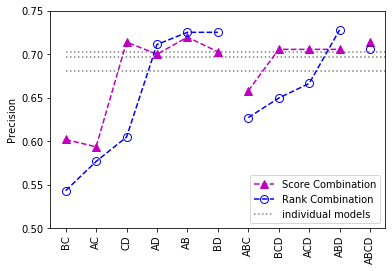

In [51]:
l1 = plt.hlines(A_prec,0,10.5,'gray', linestyle= 'dotted')
l2 = plt.hlines(B_prec,0,10.5,'gray', linestyle= 'dotted')
l3 = plt.hlines(C_prec,0,10.5,'gray', linestyle= 'dotted')
l4 = plt.hlines(D_prec,0,10.5,'gray', linestyle= 'dotted',label = 'individual models')

plt.plot(doubleDF.model, doubleDF.SC, '^--', c = 'm',markersize = 8)
plt.plot(doubleDF.model, doubleDF.RC, 'o--', c = 'b', fillstyle = 'none',markersize = 8 )

plt.plot(tripeDF.model, tripeDF.SC, '^--',c = 'm',markersize = 8 )
plt.plot(tripeDF.model, tripeDF.RC, 'o--', c = 'b',fillstyle = 'none',markersize = 8 )

plt.plot(quarticDF.model, quarticDF.SC, '^--',c = 'm',markersize = 8 , label = 'Score Combination')
plt.plot(quarticDF.model, quarticDF.RC, 'o--', c = 'b', markersize = 8 ,label = 'Rank Combination',fillstyle = 'none')

plt.ylabel("Precision")


plt.xticks(rotation=90)
plt.legend(loc = 'best')
plt.ylim(0.5,0.75)

